# Model

In [1]:
import seaborn as sns
import pandas as pd
import numpy as np
import statsmodels.api as sm
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.decomposition import PCA
from sklearn.preprocessing import scale
from sklearn.cross_decomposition import PLSRegression, PLSSVD
from sklearn.model_selection import train_test_split, cross_val_score, cross_val_predict
from sklearn.linear_model import Ridge
from sklearn import model_selection
import matplotlib.pyplot as plt

In [2]:
hit = pd.read_csv("Hitters.csv")

df = hit.copy()

df = df.dropna()

dms = pd.get_dummies(df[["League", "Division", "NewLeague"]])

y = df["Salary"]

X_ = df.drop(["Salary", "League", "Division", "NewLeague"], axis = 1).astype("float64")

X = pd.concat([X_, dms[["League_N", "Division_W", "NewLeague_N"]]], axis = 1)

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.25, random_state = 42)

In [3]:
ridge_model = Ridge(alpha = 0.1).fit(X_train, y_train)

In [4]:
ridge_model

Ridge(alpha=0.1, copy_X=True, fit_intercept=True, max_iter=None,
      normalize=False, random_state=None, solver='auto', tol=0.001)

In [5]:
ridge_model.coef_

array([ -1.77435737,   8.80240528,   7.29595605,  -3.33257639,
        -2.08316481,   5.42531283,   7.58514945,  -0.13752764,
        -0.20779701,  -0.60361067,   1.7927957 ,   0.72866408,
        -0.68710375,   0.26153564,   0.26888652,  -0.52674278,
       112.14640272, -99.80997876, -48.07152768])

In [6]:
lambdalar = 10 ** np.linspace(10, -2, 100) * 5

In [7]:
lambdalar

array([5.00000000e+10, 3.78231664e+10, 2.86118383e+10, 2.16438064e+10,
       1.63727458e+10, 1.23853818e+10, 9.36908711e+09, 7.08737081e+09,
       5.36133611e+09, 4.05565415e+09, 3.06795364e+09, 2.32079442e+09,
       1.75559587e+09, 1.32804389e+09, 1.00461650e+09, 7.59955541e+08,
       5.74878498e+08, 4.34874501e+08, 3.28966612e+08, 2.48851178e+08,
       1.88246790e+08, 1.42401793e+08, 1.07721735e+08, 8.14875417e+07,
       6.16423370e+07, 4.66301673e+07, 3.52740116e+07, 2.66834962e+07,
       2.01850863e+07, 1.52692775e+07, 1.15506485e+07, 8.73764200e+06,
       6.60970574e+06, 5.00000000e+06, 3.78231664e+06, 2.86118383e+06,
       2.16438064e+06, 1.63727458e+06, 1.23853818e+06, 9.36908711e+05,
       7.08737081e+05, 5.36133611e+05, 4.05565415e+05, 3.06795364e+05,
       2.32079442e+05, 1.75559587e+05, 1.32804389e+05, 1.00461650e+05,
       7.59955541e+04, 5.74878498e+04, 4.34874501e+04, 3.28966612e+04,
       2.48851178e+04, 1.88246790e+04, 1.42401793e+04, 1.07721735e+04,
      

In [13]:
lambdalar = 10 ** np.linspace(10, -2, 100) * 5

ridge_model = Ridge()
katsayilar = []

for i in lambdalar:
    ridge_model.set_params(alpha = i)
    ridge_model.fit(X_train, y_train)
    katsayilar.append(ridge_model.coef_)
    
katsayilar

[array([ 1.14162299e-04,  3.76251403e-05,  5.83791845e-06,  1.99994238e-05,
         2.08187287e-05,  1.67826569e-05,  3.48945616e-06,  2.16801579e-03,
         6.36028968e-04,  7.44934078e-05,  3.32831541e-04,  3.21739790e-04,
         2.34397139e-04,  1.91886916e-04,  1.62757229e-05,  2.64619752e-07,
         2.68389758e-08, -1.51725980e-07,  3.71531662e-08]),
 array([ 1.50607525e-04,  4.96462410e-05,  7.69950377e-06,  2.63975288e-05,
         2.74561410e-05,  2.21384656e-05,  4.57268107e-06,  2.84451656e-03,
         8.34685604e-04,  9.78444691e-05,  4.36903601e-04,  4.22416995e-04,
         3.07663011e-04,  2.53415630e-04,  2.14661750e-05,  3.51724233e-07,
         3.53182711e-08, -2.00577983e-07,  4.88850973e-08]),
 array([ 1.98564494e-04,  6.54713547e-05,  1.01475684e-05,  3.48263246e-05,
         3.61837319e-05,  2.91846176e-05,  5.97581171e-06,  3.72340124e-03,
         1.09291519e-03,  1.28260040e-04,  5.72270333e-04,  5.53422214e-04,
         4.02940094e-04,  3.34574426e-04, 

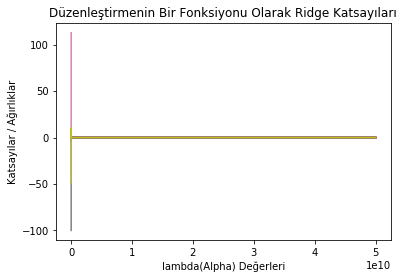

In [10]:
lambdalar = 10 ** np.linspace(10, -2, 100) * 5

ridge_model = Ridge()
katsayilar = []

for i in lambdalar:
    ridge_model.set_params(alpha = i)
    ridge_model.fit(X_train, y_train)
    katsayilar.append(ridge_model.coef_)
    
ax = plt.gca()
ax.plot(lambdalar, katsayilar)

plt.xlabel("lambda(Alpha) Değerleri")
plt.ylabel("Katsayılar / Ağırlıklar")
plt.title("Düzenleştirmenin Bir Fonksiyonu Olarak Ridge Katsayıları");

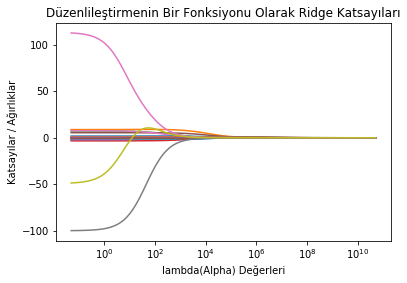

In [14]:
lambdalar = 10 ** np.linspace(10, -2, 100) * 5

ridge_model = Ridge()
katsayilar = []

for i in lambdalar:
    ridge_model.set_params(alpha = i)
    ridge_model.fit(X_train, y_train)
    katsayilar.append(ridge_model.coef_)
    
ax = plt.gca()
ax.plot(lambdalar, katsayilar)
ax.set_xscale("log")

plt.xlabel("lambda(Alpha) Değerleri")
plt.ylabel("Katsayılar / Ağırlıklar")
plt.title("Düzenlileştirmenin Bir Fonksiyonu Olarak Ridge Katsayıları");